In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset

customers = pd.read_csv('customer_segmentation_data.csv')

# preview dataset
customers.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [3]:
# see amount shape of data

customers.shape

(53503, 20)

# Preprocessing

In [4]:
# lowercase and replace space with underscore in header

customers.columns = [x.replace(" ", "_").lower() for x in customers.columns]

customers.columns

Index(['customer_id', 'age', 'gender', 'marital_status', 'education_level',
       'geographic_information', 'occupation', 'income_level',
       'behavioral_data', 'purchase_history',
       'interactions_with_customer_service', 'insurance_products_owned',
       'coverage_amount', 'premium_amount', 'policy_type',
       'customer_preferences', 'preferred_communication_channel',
       'preferred_contact_time', 'preferred_language', 'segmentation_group'],
      dtype='object')

In [5]:
# check for duplicate customers

dups = customers[customers['customer_id'].duplicated()].sort_values(by=['customer_id'], ascending=True)

dups.head(150)

,customer_id,age,gender,marital_status,education_level,geographic_information,occupation,income_level,behavioral_data,purchase_history,interactions_with_customer_service,insurance_products_owned,coverage_amount,premium_amount,policy_type,customer_preferences,preferred_communication_channel,preferred_contact_time,preferred_language,segmentation_group
3088,1,52,Male,Divorced,High School Diploma,Andaman and Nicobar Islands,Salesperson,54148,policy1,1/24/2018,In-Person,policy2,272803,2692,Business,In-Person Meeting,In-Person Meeting,Afternoon,Spanish,Segment2
1737,1,28,Male,Married,High School Diploma,Puducherry,Engineer,147691,policy1,01-09-2023,Mobile App,policy5,180123,4558,Group,Mail,Mail,Evening,Spanish,Segment4
33327,1,24,Female,Single,Associate Degree,Maharashtra,Salesperson,105821,policy3,11/27/2021,Mobile App,policy5,131381,3444,Business,Email,Text,Anytime,French,Segment3
36196,1,37,Female,Married,Master's Degree,Tamil Nadu,Artist,141061,policy3,4/19/2023,In-Person,policy2,66103,1358,Family,Text,Mail,Weekends,English,Segment2
49613,1,54,Female,Widowed,Master's Degree,Arunachal Pradesh,Teacher,58364,policy2,1/24/2018,In-Person,policy2,397970,4097,Family,In-Person Meeting,In-Person Meeting,Weekends,German,Segment1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2298,25,Male,Divorced,Doctorate,Lakshadweep,Entrepreneur,89675,policy3,11-08-2018,Mobile App,policy2,626894,4023,Business,Phone,Mail,Evening,French,Segment2
31200,2298,32,Female,Married,Doctorate,Nagaland,Entrepreneur,120100,policy3,06-06-2021,Phone,policy2,752242,4510,Family,Mail,Phone,Weekends,Spanish,Segment2
38795,2307,51,Female,Married,Bachelor's Degree,Bihar,Lawyer,41482,policy4,11/28/2023,In-Person,policy2,763782,3439,Individual,In-Person Meeting,Mail,Morning,Spanish,Segment2
28845,2329,24,Male,Married,Associate Degree,Himachal Pradesh,Entrepreneur,80644,policy2,8/14/2018,In-Person,policy4,870499,3454,Group,Phone,Phone,Evening,French,Segment2


Duplicate customer ID values do not indicate duplicate customers since age, gender, geographical, occupation and other features vary widely for the same customer ID. 

Therefore, there will be no removal of duplicate customers based on customer ID.

In [6]:
# drop customer_id fromd dataset

customers_100 = customers.drop(columns=['customer_id'], axis=1)

customers_100.columns

Index(['age', 'gender', 'marital_status', 'education_level',
       'geographic_information', 'occupation', 'income_level',
       'behavioral_data', 'purchase_history',
       'interactions_with_customer_service', 'insurance_products_owned',
       'coverage_amount', 'premium_amount', 'policy_type',
       'customer_preferences', 'preferred_communication_channel',
       'preferred_contact_time', 'preferred_language', 'segmentation_group'],
      dtype='object')

In [7]:
# check for duplicates based on all values

dups_all = customers_100[customers_100.duplicated()]

dups_all.head()

,age,gender,marital_status,education_level,geographic_information,occupation,income_level,behavioral_data,purchase_history,interactions_with_customer_service,insurance_products_owned,coverage_amount,premium_amount,policy_type,customer_preferences,preferred_communication_channel,preferred_contact_time,preferred_language,segmentation_group


There are no duplicated rows.

In [8]:
# check for missing values

nans_in_df = customers_100.isnull().any()

nans_in_df

age                                   False
gender                                False
marital_status                        False
education_level                       False
geographic_information                False
occupation                            False
income_level                          False
behavioral_data                       False
purchase_history                      False
interactions_with_customer_service    False
insurance_products_owned              False
coverage_amount                       False
premium_amount                        False
policy_type                           False
customer_preferences                  False
preferred_communication_channel       False
preferred_contact_time                False
preferred_language                    False
segmentation_group                    False
dtype: bool

There are no missing values in the dataset.

# Exploratory Data Analysis

In [9]:
# Group by location and get volumes

locations = customers_100.geographic_information
locations = locations.value_counts().reset_index().rename(columns={"index": "geographic_information",
                                                                         "geographic_information":"count"})
locations = locations.sort_values(by='count', ascending=False)
locations.head()

,geographic_information,count
0,Lakshadweep,2140
1,Himachal Pradesh,1963
2,Bihar,1962
3,Haryana,1931
4,Arunachal Pradesh,1903


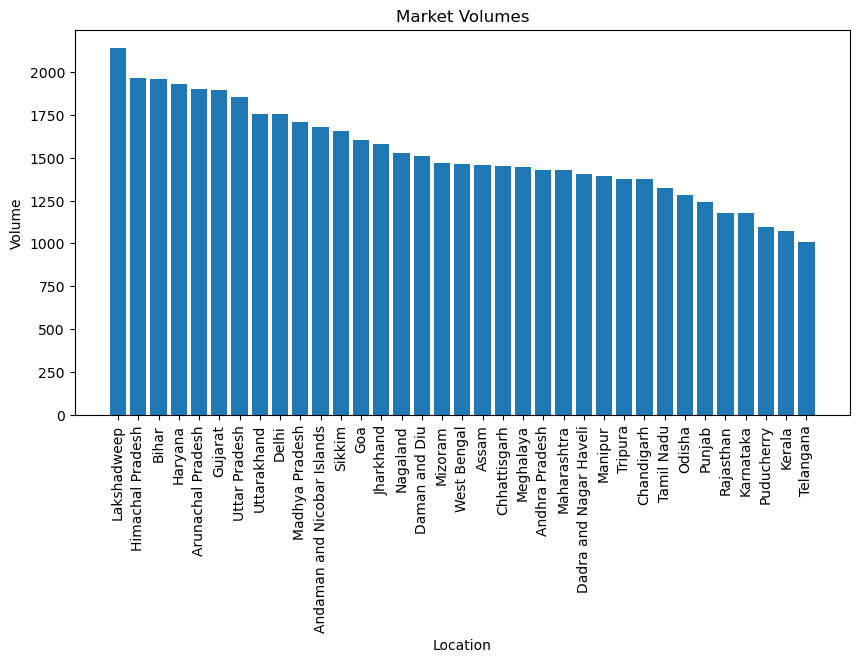

In [10]:
# create bar chart of market/location volumes

plt.figure(figsize=(10,5))
plt.bar(locations['geographic_information'], locations['count'])
plt.xlabel('Location')
plt.ylabel('Volume')
plt.title('Market Volumes')
plt.xticks(rotation=90);

In [11]:
# only use data from the market with the highest purchases 

customers_110 = customers_100[customers_100['geographic_information'] == 'Lakshadweep']

In [12]:
# create dataframe of counts for policy_type

policies = customers_110.policy_type
policies = policies.value_counts().reset_index().rename(columns={"index": "policy_type",
                                                                         "policy_type":"count"})
policies = policies.sort_values(by='count', ascending=False)
policies.head()

,policy_type,count
0,Group,746
1,Business,581
2,Family,492
3,Individual,321


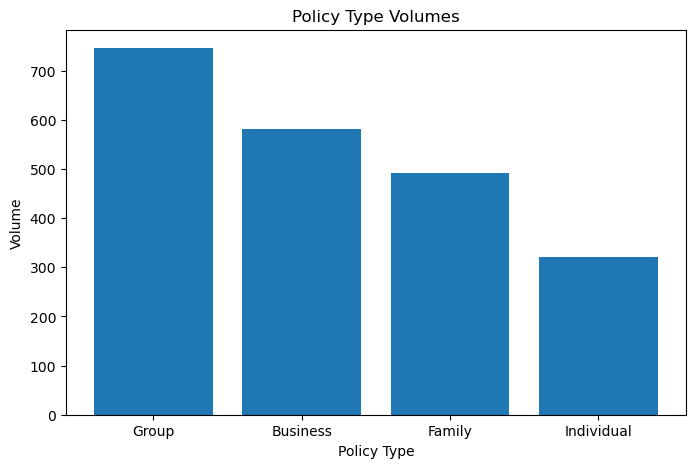

In [13]:
# create bar chart for policy type volumes

plt.figure(figsize=(8,5))
plt.bar(policies['policy_type'], policies['count'])
plt.xlabel('Policy Type')
plt.ylabel('Volume')
plt.title('Policy Type Volumes');
# plt.xticks(rotation=90);

In [14]:
# only use data for policy type individual

customers_120 = customers_110[customers_110['policy_type'] == 'Group']

In [15]:
# drop columns not pertaining to general customer information or their purchasing-related features

customers_200 = customers_120.drop(columns=[ 'occupation',
                                            'customer_preferences', 'preferred_communication_channel',
                                            'geographic_information', 'preferred_contact_time',
                                            'preferred_language', 'segmentation_group',
                                            'interactions_with_customer_service'])

customers_200.head()



,age,gender,marital_status,education_level,income_level,behavioral_data,purchase_history,insurance_products_owned,coverage_amount,premium_amount,policy_type
149,31,Male,Married,Bachelor's Degree,144559,policy1,07-09-2018,policy1,949161,4628,Group
157,68,Male,Married,High School Diploma,69328,policy2,10-03-2023,policy1,187922,3864,Group
305,63,Female,Divorced,Associate Degree,36520,policy3,5/20/2020,policy1,628121,3011,Group
449,25,Male,Widowed,Master's Degree,103927,policy3,5/22/2022,policy1,791913,3346,Group
467,36,Female,Married,Associate Degree,70458,policy3,8/16/2019,policy5,205326,2417,Group


There are two differnt date formats, MM-DD-YYYY and MM/DD/YYYY, this must be cleaned

In [16]:
# check datatype for purchase history

customers_200['purchase_history'].dtypes

dtype('O')

In [17]:
# convert purchase_history to datetime, rename column to original name and drop it

customers_200['purchase_history_frmt'] = pd.to_datetime(customers_200['purchase_history'])
customers_210 = customers_200.drop(columns=['purchase_history'], axis=1).rename(columns={"purchase_history_frmt":
                                                                               "purchase_history"})
customers_210.head(15)

,age,gender,marital_status,education_level,income_level,behavioral_data,insurance_products_owned,coverage_amount,premium_amount,policy_type,purchase_history
149,31,Male,Married,Bachelor's Degree,144559,policy1,policy1,949161,4628,Group,2018-07-09
157,68,Male,Married,High School Diploma,69328,policy2,policy1,187922,3864,Group,2023-10-03
305,63,Female,Divorced,Associate Degree,36520,policy3,policy1,628121,3011,Group,2020-05-20
449,25,Male,Widowed,Master's Degree,103927,policy3,policy1,791913,3346,Group,2022-05-22
467,36,Female,Married,Associate Degree,70458,policy3,policy5,205326,2417,Group,2019-08-16
554,45,Male,Married,Bachelor's Degree,26722,policy1,policy2,761227,3053,Group,2018-04-25
572,55,Male,Widowed,Master's Degree,63098,policy2,policy3,200135,3565,Group,2021-03-01
601,33,Male,Separated,High School Diploma,92948,policy5,policy4,455212,2672,Group,2022-05-21
662,42,Male,Divorced,Doctorate,118914,policy2,policy1,842428,3599,Group,2022-11-23
794,21,Male,Married,Bachelor's Degree,28307,policy3,policy4,540438,1841,Group,2018-03-12


In [18]:
# create purchase date to overall quarter and month for analysis

customers_210['quarter_overall'] = customers_210['purchase_history'].dt.quarter

customers_210['purchase_month'] = customers_210['purchase_history'].dt.month

customers_210[['quarter_overall', 'purchase_month']].head()

,quarter_overall,purchase_month
149,3,7
157,4,10
305,2,5
449,2,5
467,3,8


In [19]:
# create table for amount of purchases on a given day

purchases = customers_210.purchase_history
purchase_counts = purchases.value_counts().reset_index().rename(columns={"index": "purchase_history",
                                                                         "purchase_history":"purchases"})
purchase_counts_100 = purchase_counts.sort_values(by='purchase_history', ascending=True)
purchase_counts_100.head()

,purchase_history,purchases
288,2018-01-01,1
90,2018-01-09,2
464,2018-01-10,1
245,2018-01-14,1
174,2018-01-15,1


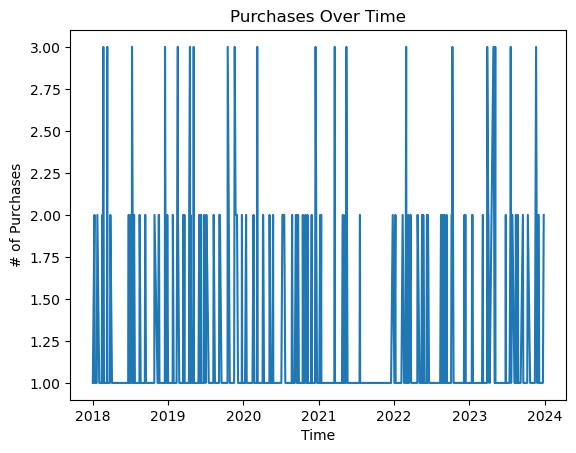

In [20]:
# create step plot for purchases over time for each day

plt.plot(purchase_counts_100['purchase_history'], purchase_counts_100['purchases'])
plt.xlabel('Time')
plt.ylabel('# of Purchases')
plt.title('Purchases Over Time');

In [21]:
# create table for amount of purchases in each quarter overall

purchases = customers_210.quarter_overall
purchase_counts = purchases.value_counts().reset_index().rename(columns={"index": "quarter_overall",
                                                                         "quarter_overall":"purchases"})
purchase_counts_100 = purchase_counts.sort_values(by='quarter_overall', ascending=True)
purchase_counts_100.head()

,quarter_overall,purchases
0,1,207
2,2,181
3,3,173
1,4,185


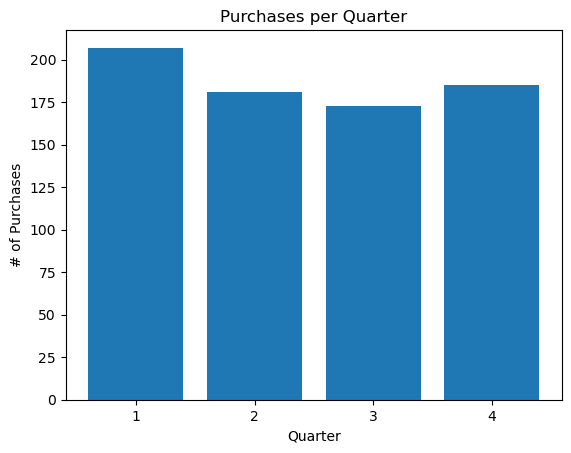

In [22]:
# create bar chart for purchases over time by quarter

plt.bar(purchase_counts_100['quarter_overall'], purchase_counts_100['purchases'])
plt.xlabel('Quarter')
plt.ylabel('# of Purchases')
plt.title('Purchases per Quarter')
plt.xticks(np.arange(1,5,1));

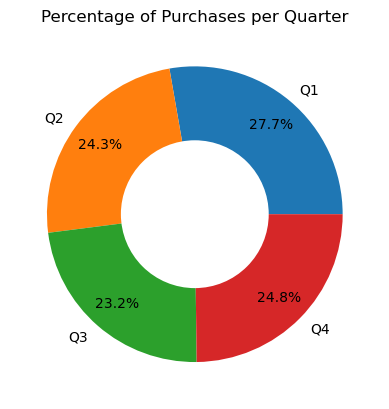

In [23]:
# create donut chart for breakdown of purchases by quarter
labels = ['Q1','Q2','Q3','Q4']
plt.pie(data = purchase_counts_100, x ='purchases', labels = labels, autopct='%.1f%%', pctdistance=0.80)

# draw circle
circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(circle)

plt.title('Percentage of Purchases per Quarter');

In [24]:
# create table for amount of purchases in each month overall

purchases_month = customers_210.purchase_month
purchases_month_counts = purchases_month.value_counts().reset_index().rename(columns={"index": "purchase_month",
                                                                         "purchase_month":"purchases"})
purchases_month_counts_100 = purchases_month_counts.sort_values(by='purchase_month', ascending=True)
purchases_month_counts_100.head()

,purchase_month,purchases
3,1,64
5,2,62
0,3,81
6,4,61
2,5,64


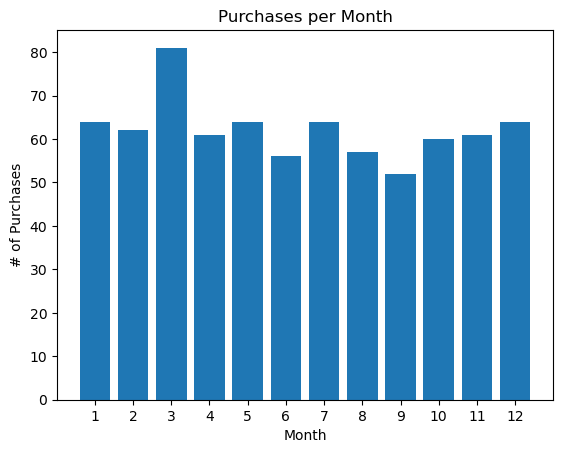

In [25]:
# create step plot for purchases over time by quarter

plt.bar(purchases_month_counts_100['purchase_month'], purchases_month_counts_100['purchases'])
plt.xlabel('Month')
plt.ylabel('# of Purchases')
plt.title('Purchases per Month')
plt.xticks(np.arange(1,13,1));

In [26]:
# sum premium by quarter and month of purchase 

quarter_avgs = customers_210[['coverage_amount', 'premium_amount',
                                 'quarter_overall']].groupby('quarter_overall').mean()

month_avgs = customers_210[['coverage_amount', 'premium_amount',
                                 'purchase_month']].groupby('purchase_month').mean()

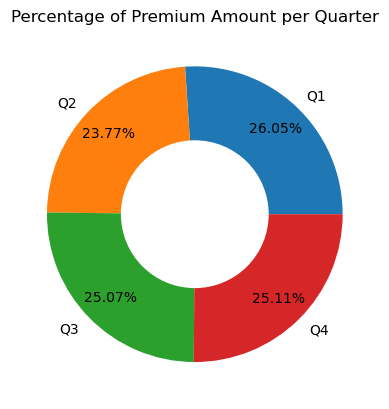

In [27]:
# create donut chart for breakdown of purchases by quarter
labels = ['Q1','Q2','Q3','Q4']
plt.pie(data = quarter_avgs, x ='premium_amount', labels = labels, autopct='%.2f%%', pctdistance=0.80)

# draw circle
circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(circle)

plt.title('Percentage of Premium Amount per Quarter');

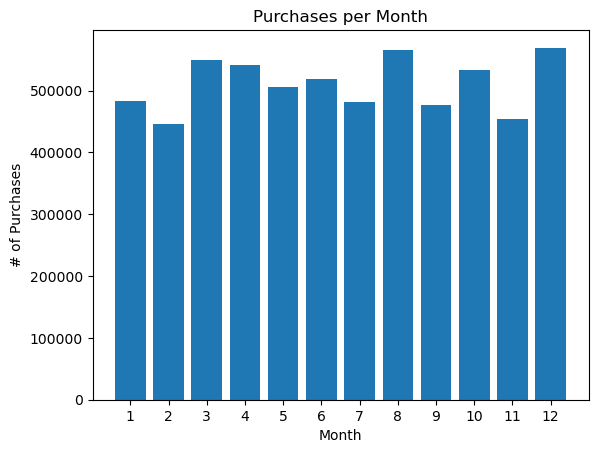

In [28]:
# create step plot for purchases over time by quarter

plt.bar(month_avgs.index, month_avgs['coverage_amount'])
plt.xlabel('Month')
plt.ylabel('# of Purchases')
plt.title('Purchases per Month')
plt.xticks(np.arange(1,13,1));

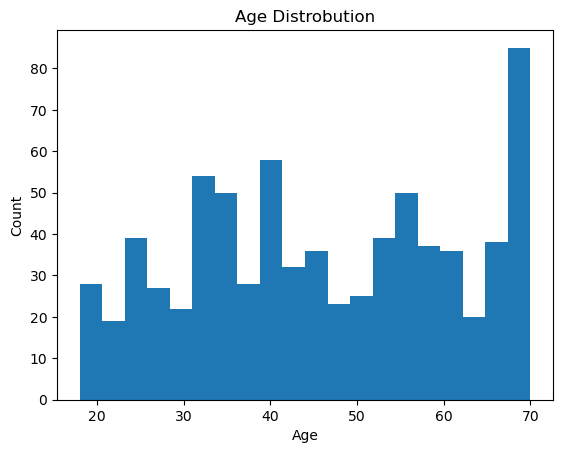

In [29]:
# view age distrobution

plt.hist(customers_210['age'], bins=20)
plt.title('Age Distrobution')
plt.xlabel('Age')
plt.ylabel('Count');

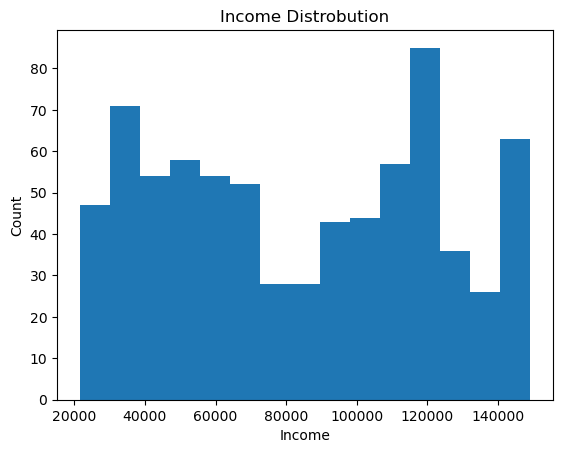

In [30]:
# view income distrobution

plt.hist(customers_210['income_level'], bins=15)
plt.title('Income Distrobution')
plt.xlabel('Income')
plt.ylabel('Count');

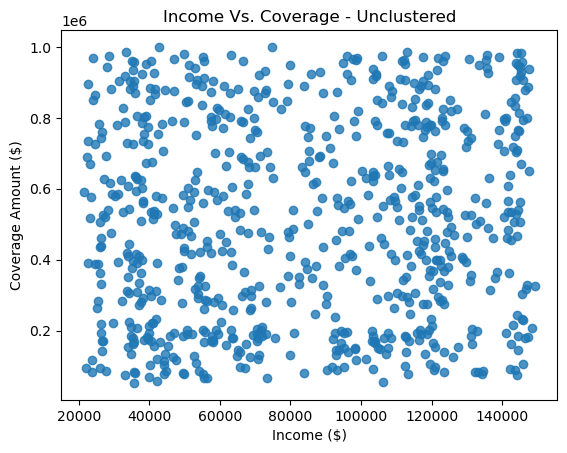

In [31]:
# view scatter plot for income and coverage amounts

plt.scatter(x=customers_210['income_level'],y=customers_210['coverage_amount'], alpha=0.8)
plt.title("Income Vs. Coverage - Unclustered")
plt.ylabel("Coverage Amount ($)")
plt.xlabel("Income ($)");

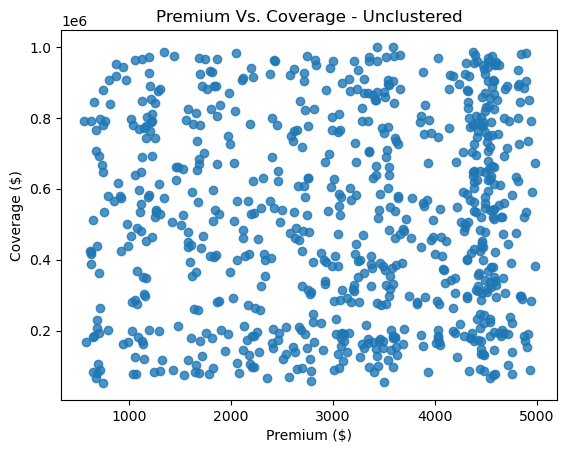

In [32]:
# View scatter plot for premium and coverage amounts

plt.scatter(x=customers_210['premium_amount'],y=customers_210['coverage_amount'], alpha=0.8)
plt.title("Premium Vs. Coverage - Unclustered")
plt.ylabel("Coverage ($)")
plt.xlabel("Premium ($)");

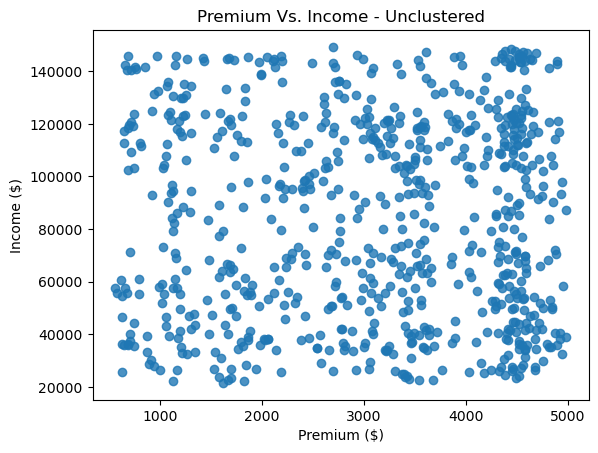

In [33]:
# view scatter plot for premium and income amounts

plt.scatter(x=customers_210['premium_amount'],y=customers_210['income_level'], alpha=0.8)
plt.title("Premium Vs. Income - Unclustered")
plt.ylabel("Income ($)")
plt.xlabel("Premium ($)");

# Create Dummy Variables for Categorical Features

In [34]:
# change gender to 0 and 1

customers_210['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [35]:
# create dummy variables for remaining categorical features

categoricals = ['insurance_products_owned']

customers_300 = pd.get_dummies(customers_210, columns=categoricals, drop_first=True)

customers_300.head()

,age,gender,marital_status,education_level,income_level,behavioral_data,coverage_amount,premium_amount,policy_type,purchase_history,quarter_overall,purchase_month,insurance_products_owned_policy2,insurance_products_owned_policy3,insurance_products_owned_policy4,insurance_products_owned_policy5
149,31,1,Married,Bachelor's Degree,144559,policy1,949161,4628,Group,2018-07-09,3,7,0,0,0,0
157,68,1,Married,High School Diploma,69328,policy2,187922,3864,Group,2023-10-03,4,10,0,0,0,0
305,63,0,Divorced,Associate Degree,36520,policy3,628121,3011,Group,2020-05-20,2,5,0,0,0,0
449,25,1,Widowed,Master's Degree,103927,policy3,791913,3346,Group,2022-05-22,2,5,0,0,0,0
467,36,0,Married,Associate Degree,70458,policy3,205326,2417,Group,2019-08-16,3,8,0,0,0,1


Creating dummy variables and running through the k-means clustering algorithm did not yield significant results, therefore non-numerical features will be dropped. Transactional data will be the focus.

In [36]:
# drop non-numerical columns and focus on transactional data

columns_to_drop = ['marital_status','education_level', 'purchase_history', 'quarter_overall', 'purchase_month',
                   'policy_type', 'gender', 'behavioral_data', 'insurance_products_owned']

customers_310 = customers_210.drop(columns=columns_to_drop, axis=1)

customers_310.head()

,age,income_level,coverage_amount,premium_amount
149,31,144559,949161,4628
157,68,69328,187922,3864
305,63,36520,628121,3011
449,25,103927,791913,3346
467,36,70458,205326,2417


# Apply min-max scaler to data

In [37]:
# apply min-max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(customers_310)

customer_scaled = scaler.transform(customers_310)

In [38]:
# turn scaled values back to dataframe

customers_scaled_100 = pd.DataFrame(customer_scaled, columns=customers_310.columns)

customers_scaled_100.head()

,age,income_level,coverage_amount,premium_amount
0,0.250000,0.963385,0.946361,0.920380
1,0.961538,0.374548,0.143200,0.747568
2,0.865385,0.117758,0.607641,0.554626
3,0.134615,0.645356,0.780454,0.630400
4,0.346154,0.383393,0.161563,0.420267


In [39]:
# observed scaled features

customers_scaled_100.describe()

,age,income_level,coverage_amount,premium_amount
count,746.000000,746.000000,746.000000,746.000000
mean,0.537766,0.489153,0.484720,0.569652
std,0.293476,0.297281,0.293253,0.291500
min,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.220930,0.222923,0.322495
50%,0.519231,0.495034,0.483232,0.615924
75%,0.769231,0.757040,0.756009,0.860043
max,1.000000,1.000000,1.000000,1.000000


# Deploy K-Means Clustering Algorithm

In [40]:
# use elbow method to find optimal k

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(customer_scaled)
    Sum_of_squared_distances.append(km.inertia_)

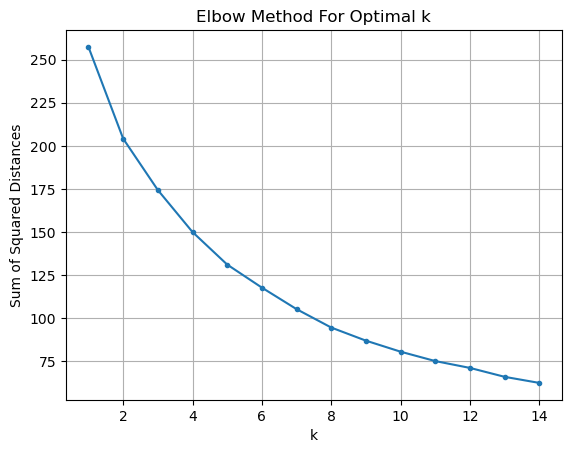

In [41]:
# create elbow plot to determine optimal number of clusters

plt.plot(K, Sum_of_squared_distances, '.-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [42]:
# apply k means clustering algorithm with optimal number of clusters(k=3)

kmeans = KMeans(n_clusters=3)

cluster=kmeans.fit_predict(customers_scaled_100)

# append the cluster for each customer to dataframes, used later for analysis
customers_120['cluster'] = cluster
customers_210['cluster'] = cluster
customers_scaled_100['cluster'] = cluster

In [43]:
# apply PCA transform to view clusters in 2D plot

from sklearn.decomposition import PCA

pca=PCA(n_components=2)

reduced_features = pca.fit_transform(customers_scaled_100.drop(columns=['cluster'], axis=1))

customers_scaled_100['pca_1'] = reduced_features[:, 0]
customers_scaled_100['pca_2'] = reduced_features[:, 1]

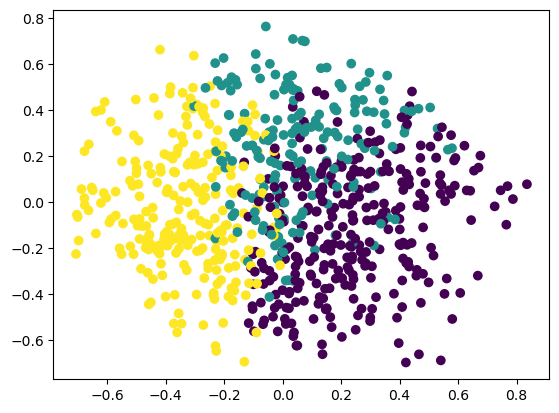

In [44]:
plt.scatter(customers_scaled_100['pca_1'], customers_scaled_100['pca_2'],
            c=customers_scaled_100['cluster'], cmap='viridis');

# Analyze dataset using new clusters

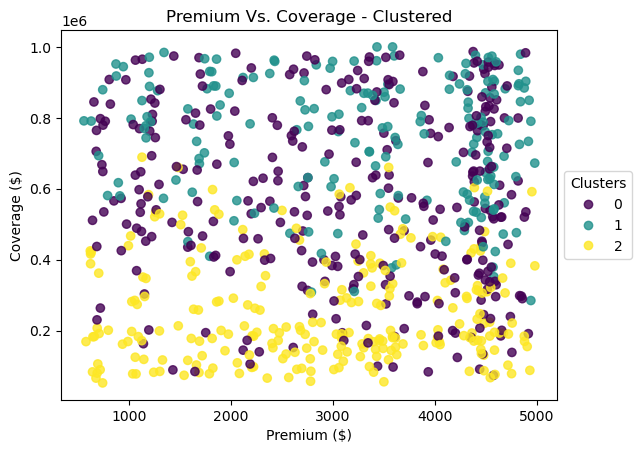

In [45]:
# create scatter plot from EDA section, but add cluster as the color

fig, ax = plt.subplots()

scatter = ax.scatter(x=customers_210['premium_amount'],y=customers_210['coverage_amount'],
            alpha=0.8,c=customers_210['cluster'])

ax.legend(*scatter.legend_elements(), title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Premium Vs. Coverage - Clustered")
plt.ylabel("Coverage ($)")
plt.xlabel("Premium ($)");

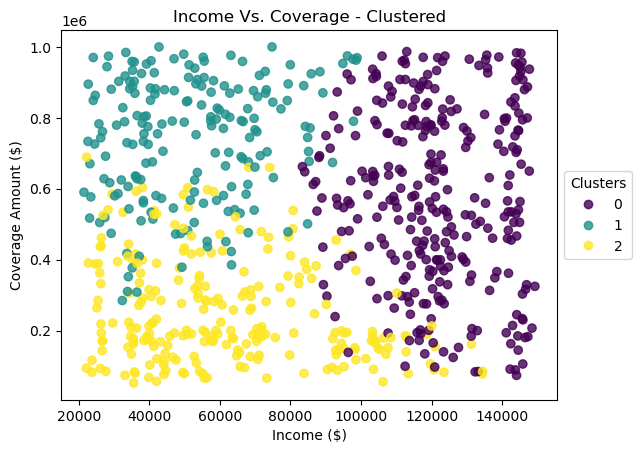

In [46]:
# create scatter plot from EDA section, but add cluster as the color

fig, ax = plt.subplots()

scatter = ax.scatter(x=customers_210['income_level'],y=customers_210['coverage_amount'],
            alpha=0.8,c=customers_210['cluster'])

ax.legend(*scatter.legend_elements(), title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Income Vs. Coverage - Clustered")
plt.ylabel("Coverage Amount ($)")
plt.xlabel("Income ($)");

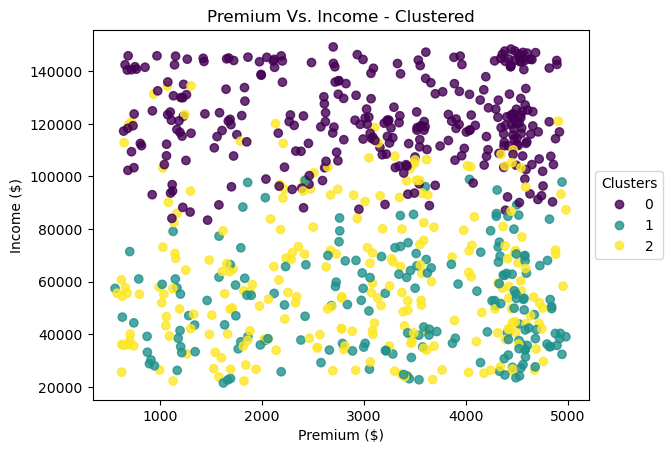

In [47]:
# create scatter plot from EDA section, but add cluster as the color

fig, ax = plt.subplots()

scatter = ax.scatter(y=customers_210['income_level'],x=customers_210['premium_amount'],
            alpha=0.8,c=customers_210['cluster'])

ax.legend(*scatter.legend_elements(), title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Premium Vs. Income - Clustered")
plt.ylabel("Income ($)")
plt.xlabel("Premium ($)");

In [48]:
# create bar chart for average premium by cluster

customers_avg = customers_210[['cluster','income_level','premium_amount','coverage_amount']].groupby('cluster').mean()

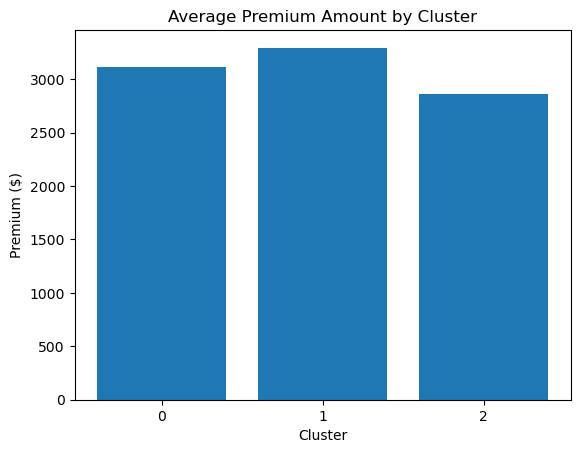

In [49]:
plt.bar(customers_avg.index, customers_avg['premium_amount'])
plt.xticks(np.arange(0,3,1))
plt.title("Average Premium Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Premium ($)");

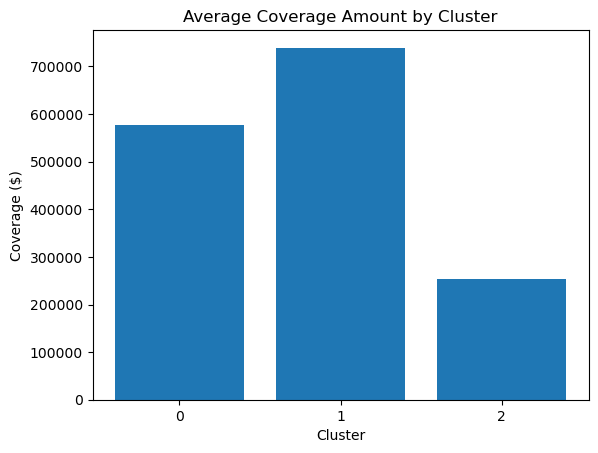

In [50]:
# create bar chart for average coverage amount by cluster

plt.bar(customers_avg.index, customers_avg['coverage_amount'])
plt.xticks(np.arange(0,3,1))
plt.title("Average Coverage Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Coverage ($)");

In [51]:
# create bar chart for total premium by cluster

customers_sum = customers_210[['cluster','income_level','premium_amount','coverage_amount']].groupby('cluster').sum()

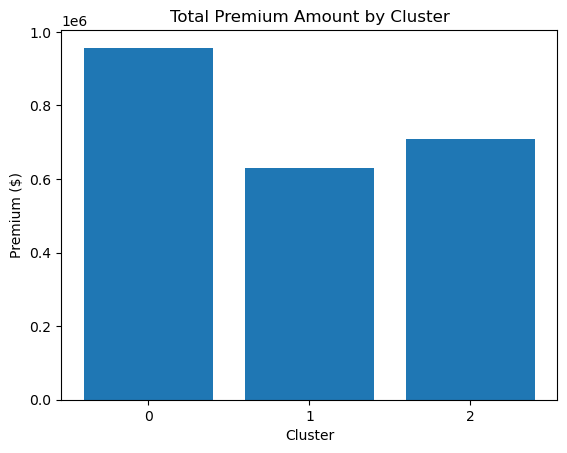

In [52]:
plt.bar(customers_sum.index, customers_sum['premium_amount'])
plt.xticks(np.arange(0,3,1))
plt.title("Total Premium Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Premium ($)");

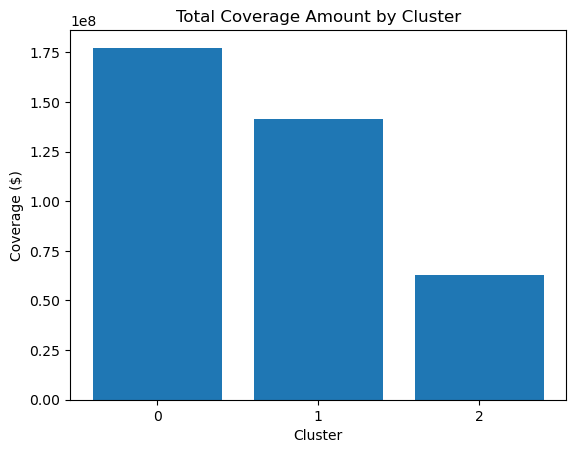

In [53]:
# create bar chart for total coverage amount by cluster

plt.bar(customers_sum.index, customers_sum['coverage_amount'])
plt.xticks(np.arange(0,3,1))
plt.title("Total Coverage Amount by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Coverage ($)");

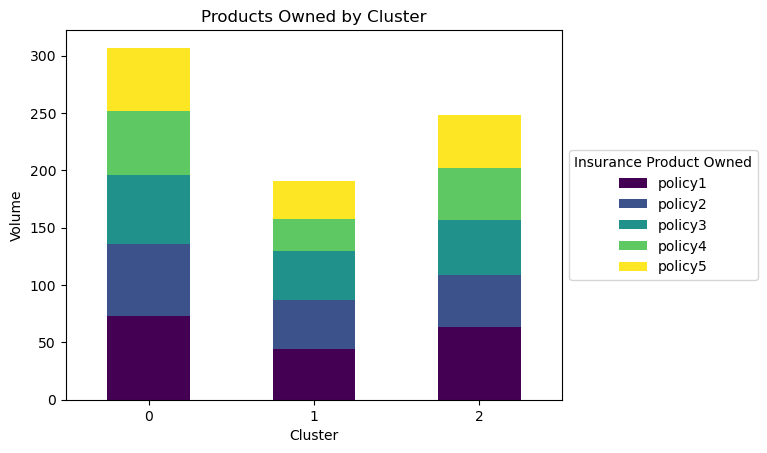

In [54]:
# Group by insurance_product_owned and cluster, then unstack and plot

customers_210.groupby(['cluster', 'insurance_products_owned']).size().unstack().plot(kind='bar',
                                                                                     stacked=True,
                                                                                     cmap='viridis',
                                                                                     title='Products Owned by Cluster')

plt.xticks(rotation=0.01)
plt.ylabel('Volume')
plt.xlabel('Cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Insurance Product Owned');

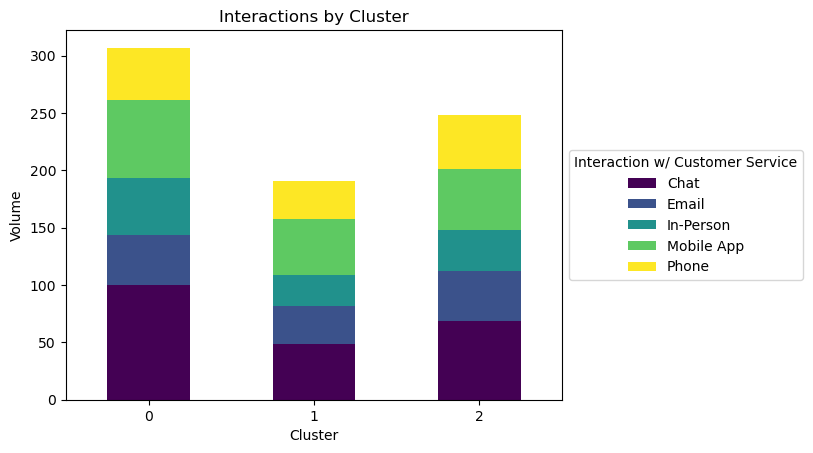

In [55]:
# Group by interactions_with_customer_service and cluster, then unstack and plot

customers_120.groupby(['cluster', 'interactions_with_customer_service']).size().unstack().plot(kind='bar',
                                                                                     stacked=True,
                                                                                     cmap='viridis',
                                                                                     title='Interactions by Cluster')

plt.xticks(rotation=0.01)
plt.ylabel('Volume')
plt.xlabel('Cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Interaction w/ Customer Service');